In [1]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing Housing Dataset
df=pd.read_csv('train.csv')
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking for columns with high null values (more than 40%)
((df.isnull().sum()/df.shape[0])*100)[((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)>40]

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [7]:
# Dropping ID column and columns with more than 40% data missing
df=df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis='columns')

In [8]:
# Checking for other columns with missing values
(df.isnull().sum()/len(df.index)*100)[(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)>0]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [9]:
# Imputing missing categorical variables with Mode values and continuous variables with median values
df['MasVnrType'].fillna('None',inplace=True)
#MasVnrArea 0.0 --> Median
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['BsmtQual'].fillna('TA',inplace=True)
df['BsmtCond'].fillna('TA',inplace=True)
df['BsmtExposure'].fillna('No',inplace=True)
df['BsmtFinType1'].fillna('Unf',inplace=True)
df['BsmtFinType2'].fillna('Unf',inplace=True)
df['Electrical'].fillna('SBrkr',inplace=True)
df['GarageType'].fillna('Attchd',inplace=True)
#GarageYrBlt 2005.0 --> No Idea about year columns
df['GarageFinish'].fillna('Unf',inplace=True)
df['GarageQual'].fillna('TA',inplace=True)
df['GarageCond'].fillna('TA',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)
#df['Alley'].fillna('NA',inplace=True)
df['GarageYrBlt'].fillna(-1,inplace=True)

In [10]:
df.shape

(1460, 76)

In [11]:
# Splitting Categorical and Continuous variables
cat=['MSSubClass','MSZoning','SaleCondition','Street','LotShape','LandContour','Utilities',
     'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
     'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath',
     'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional',
     'Fireplaces','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive',
     'MoSold','SaleType','OverallQual','OverallCond',]
cont=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
      '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
      '3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice','LotFrontage']

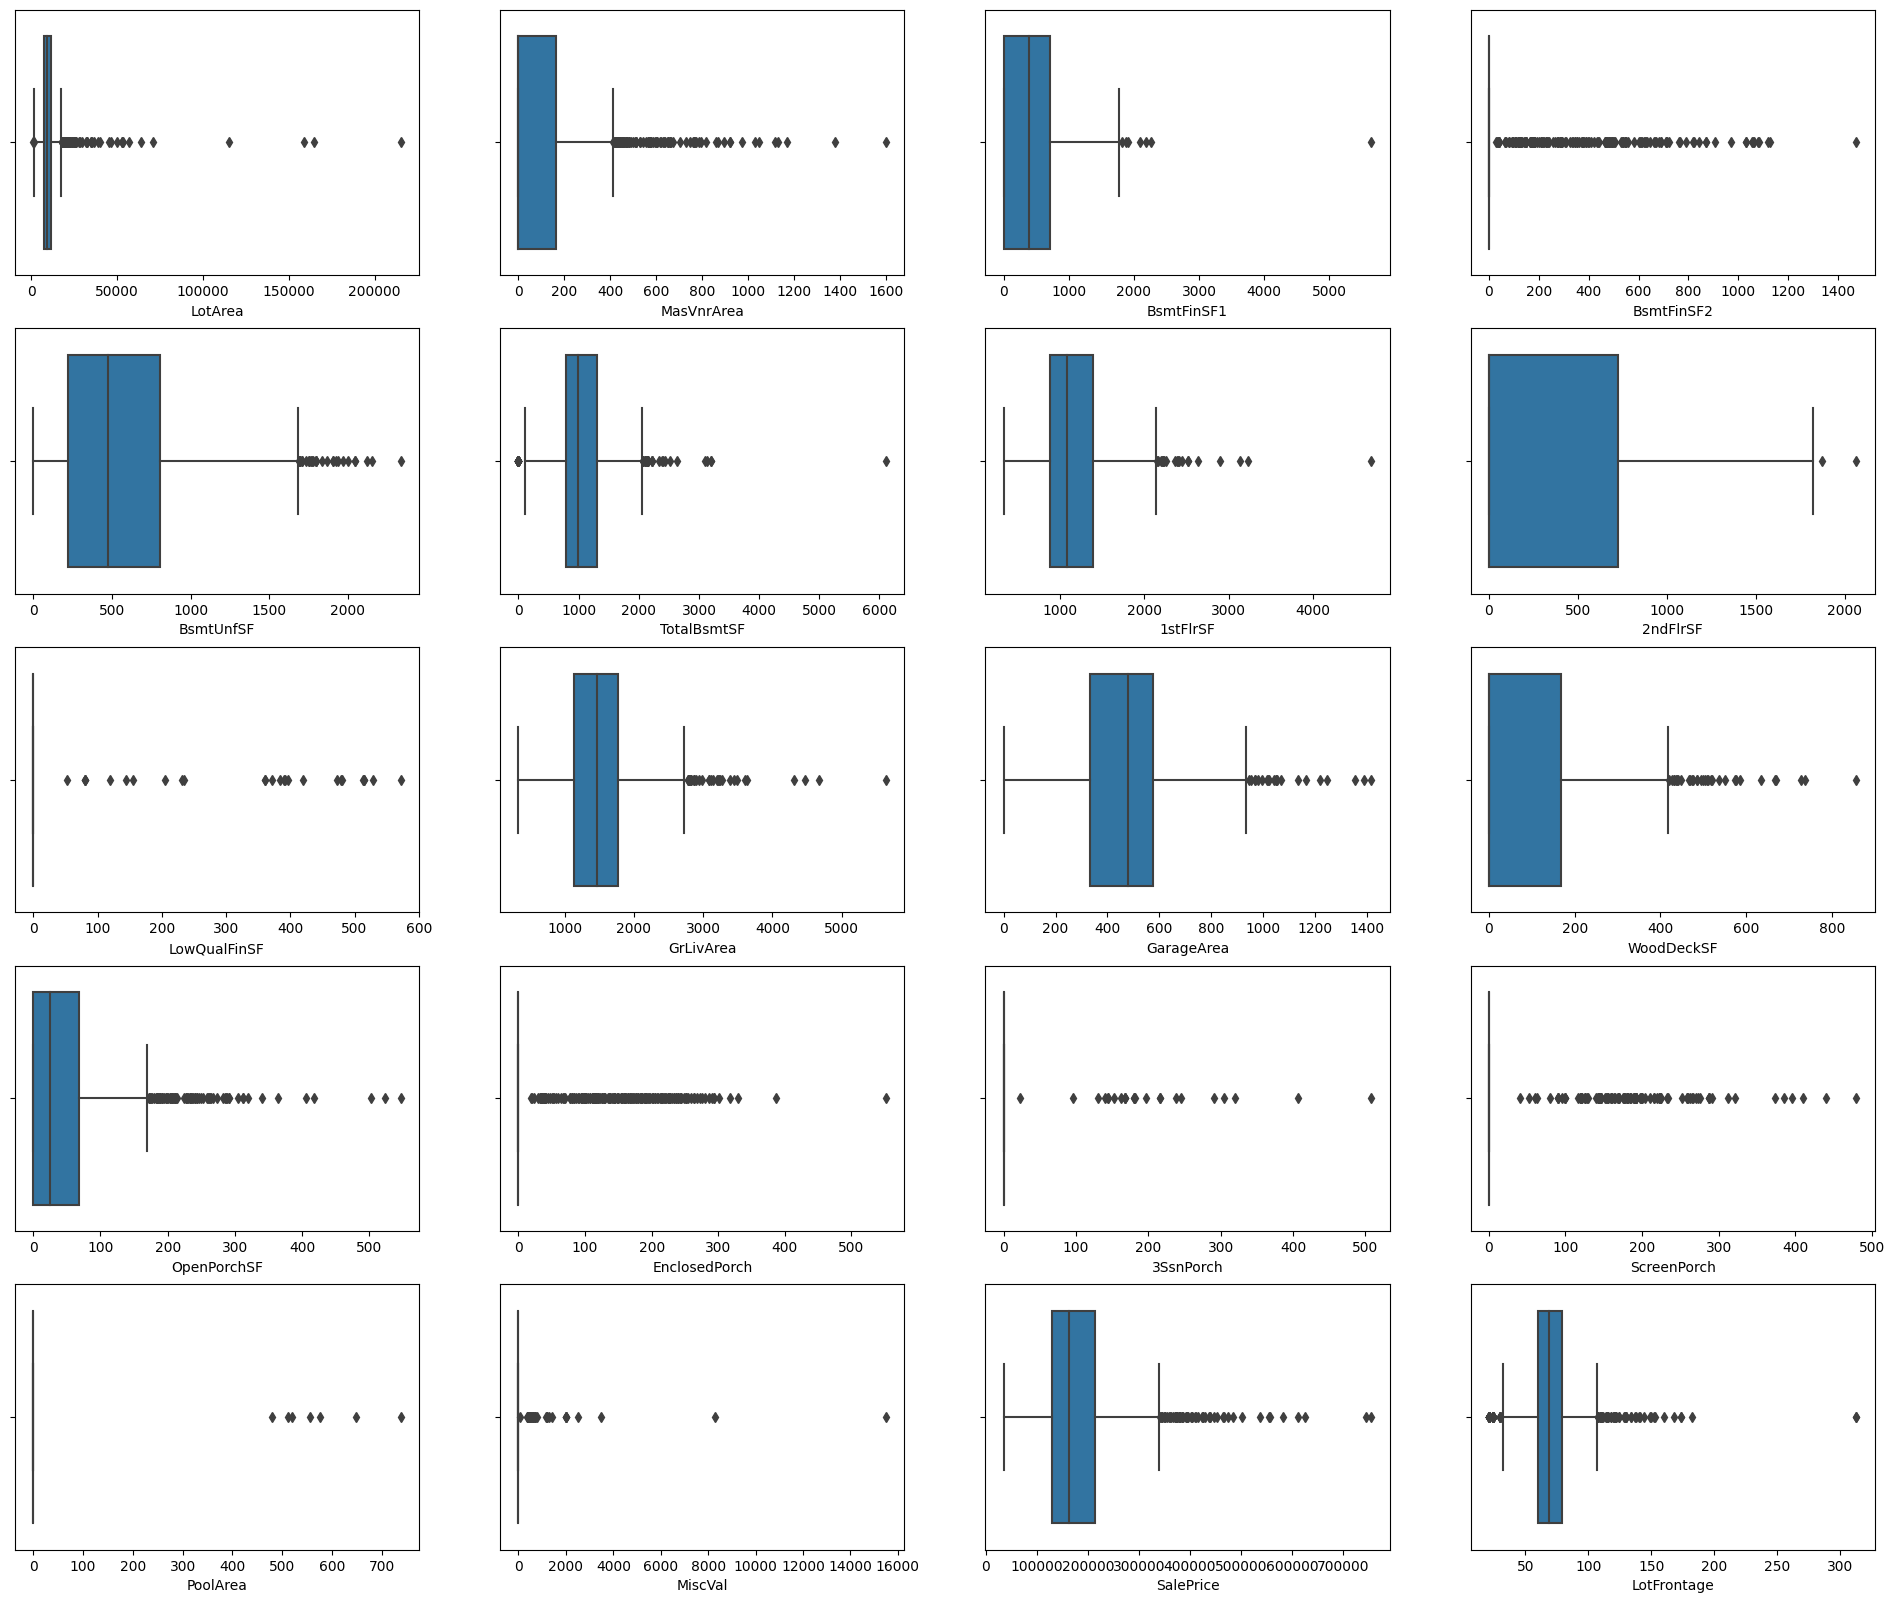

In [12]:
# Univariate Analysis for Continuous variables using box plot to identify outliers and spread of variables
plt.subplots(figsize=(24,20))
j=0
for i in cont:
    j=j+1
    plt.subplot(5,4,j)
    sns.boxplot(x=df[i])
    plt.xlabel(i)
plt.show()

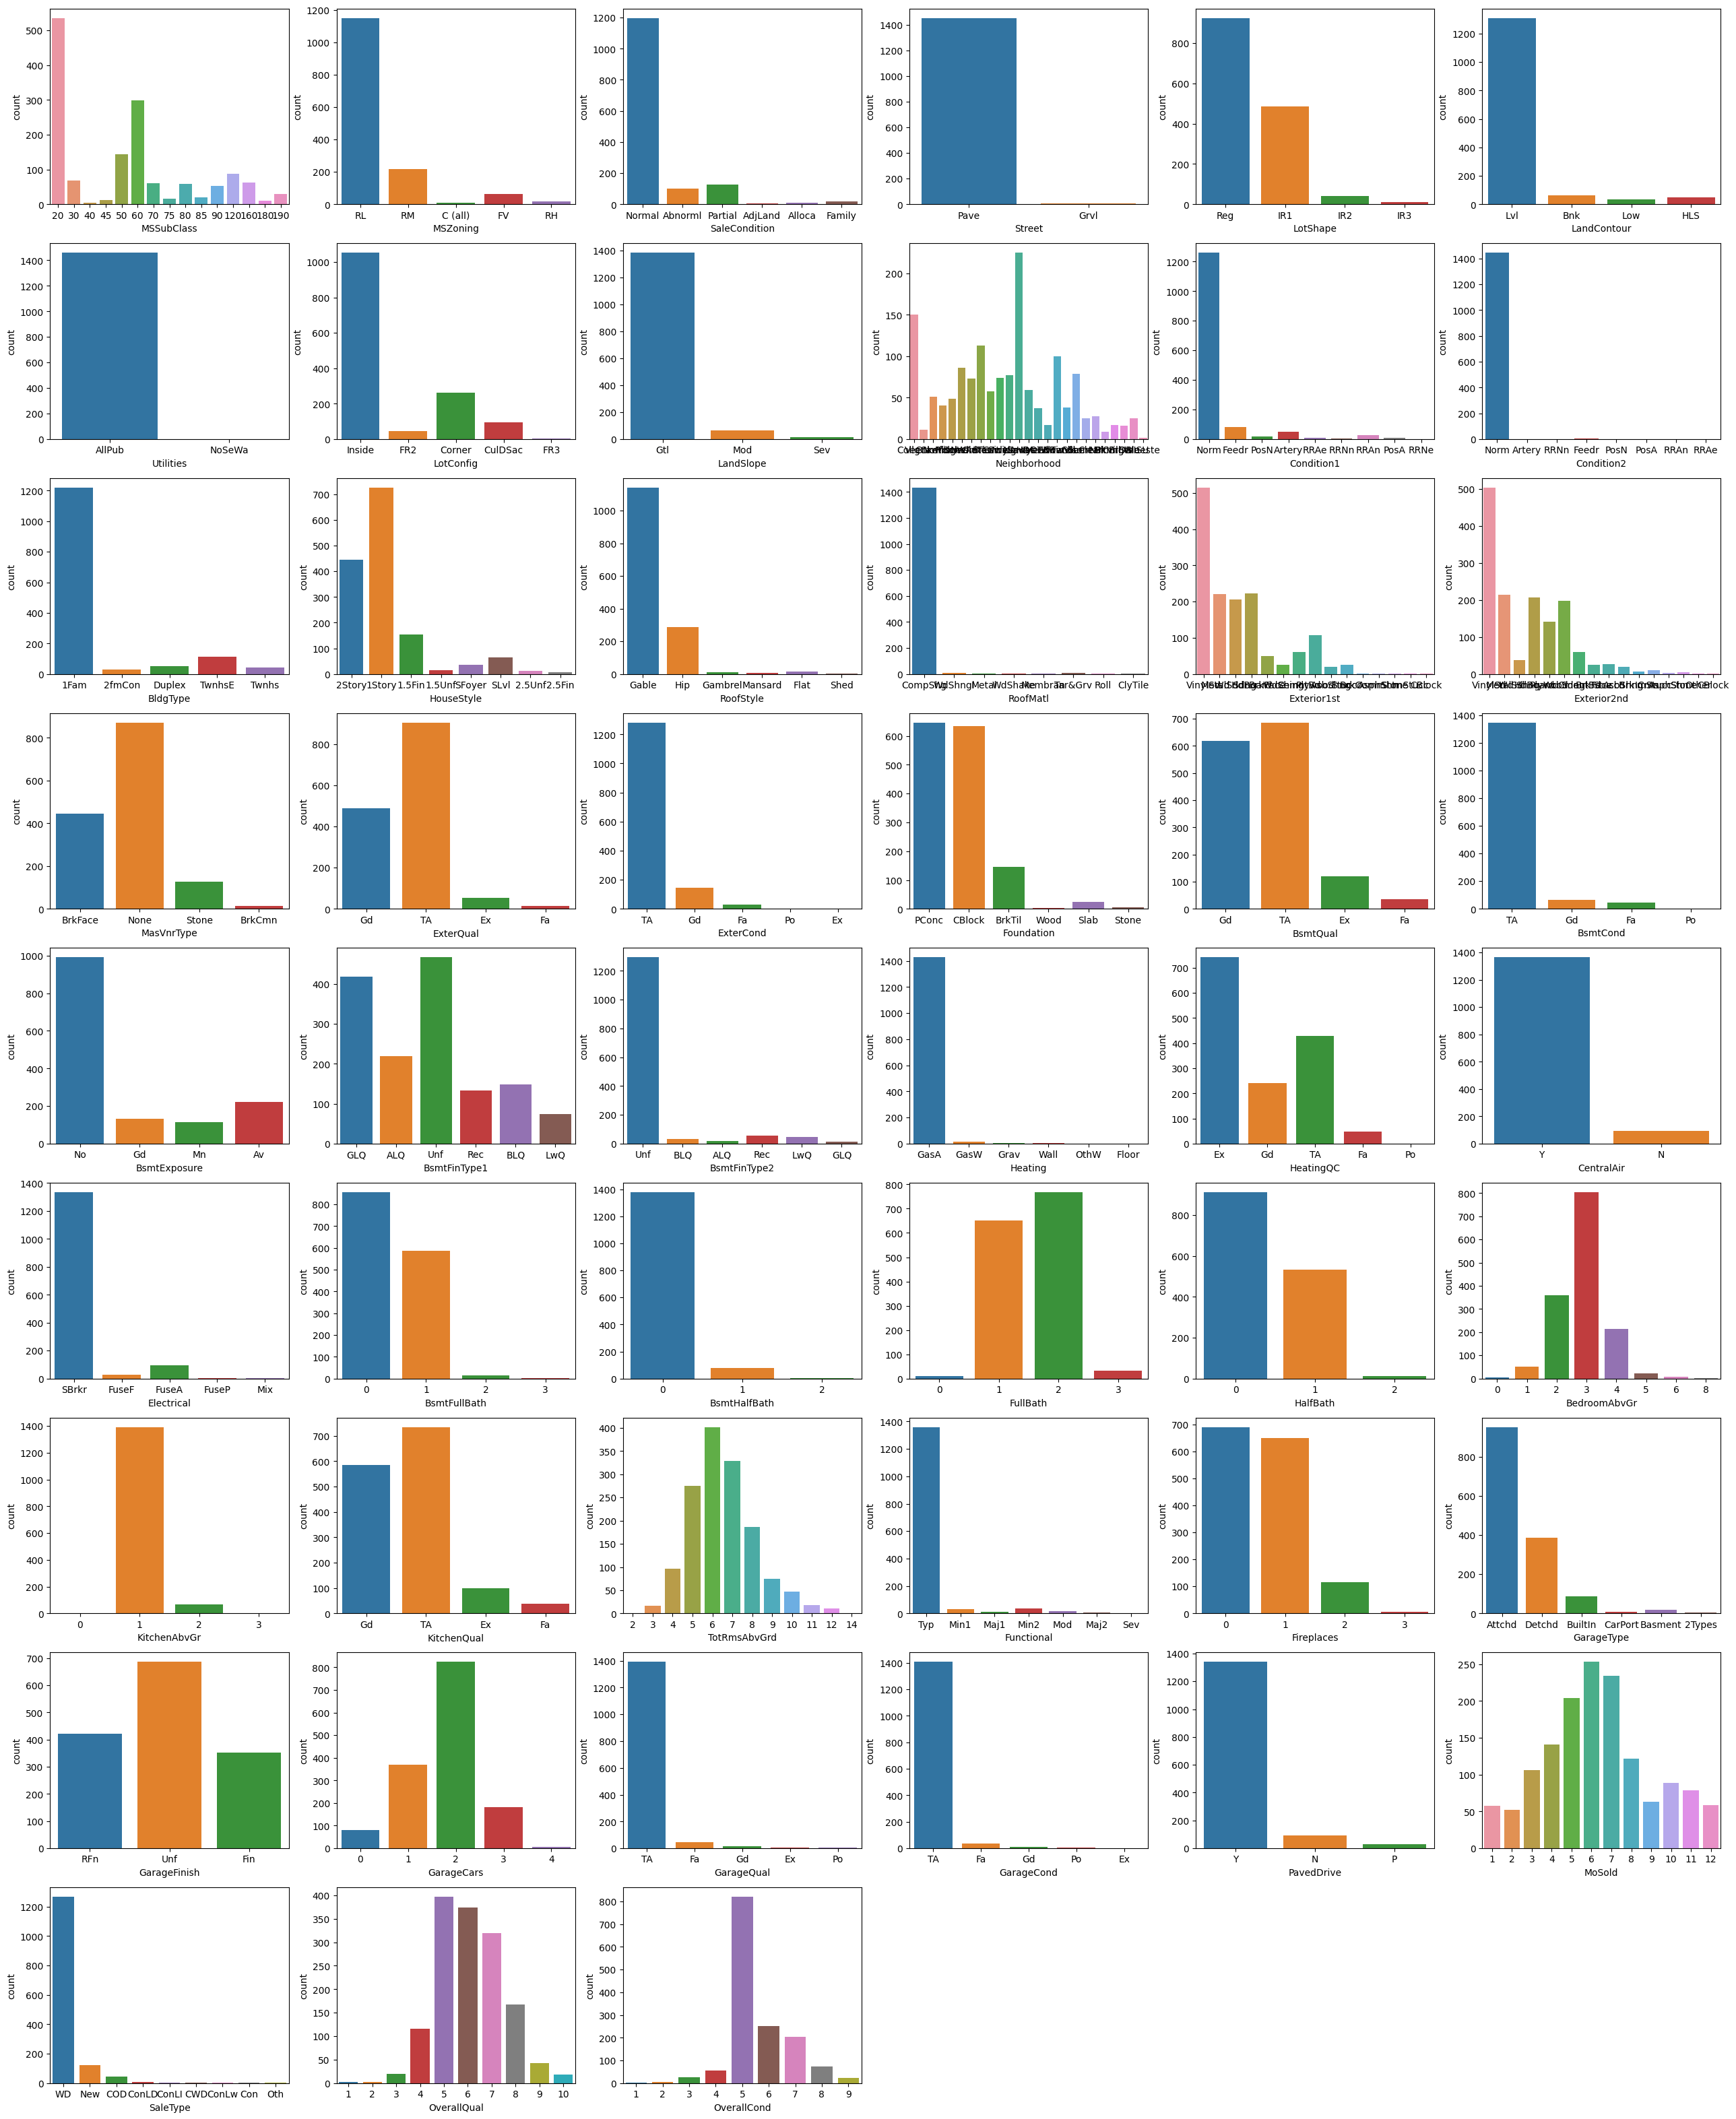

In [13]:
# Univariate Analysis for Categorical Variables
plt.subplots(figsize=(32,40))
j=0
for i in cat:
    j=j+1
    plt.subplot(9,6,j)
    sns.countplot(x=df[i])
    plt.xlabel(i)
plt.show()

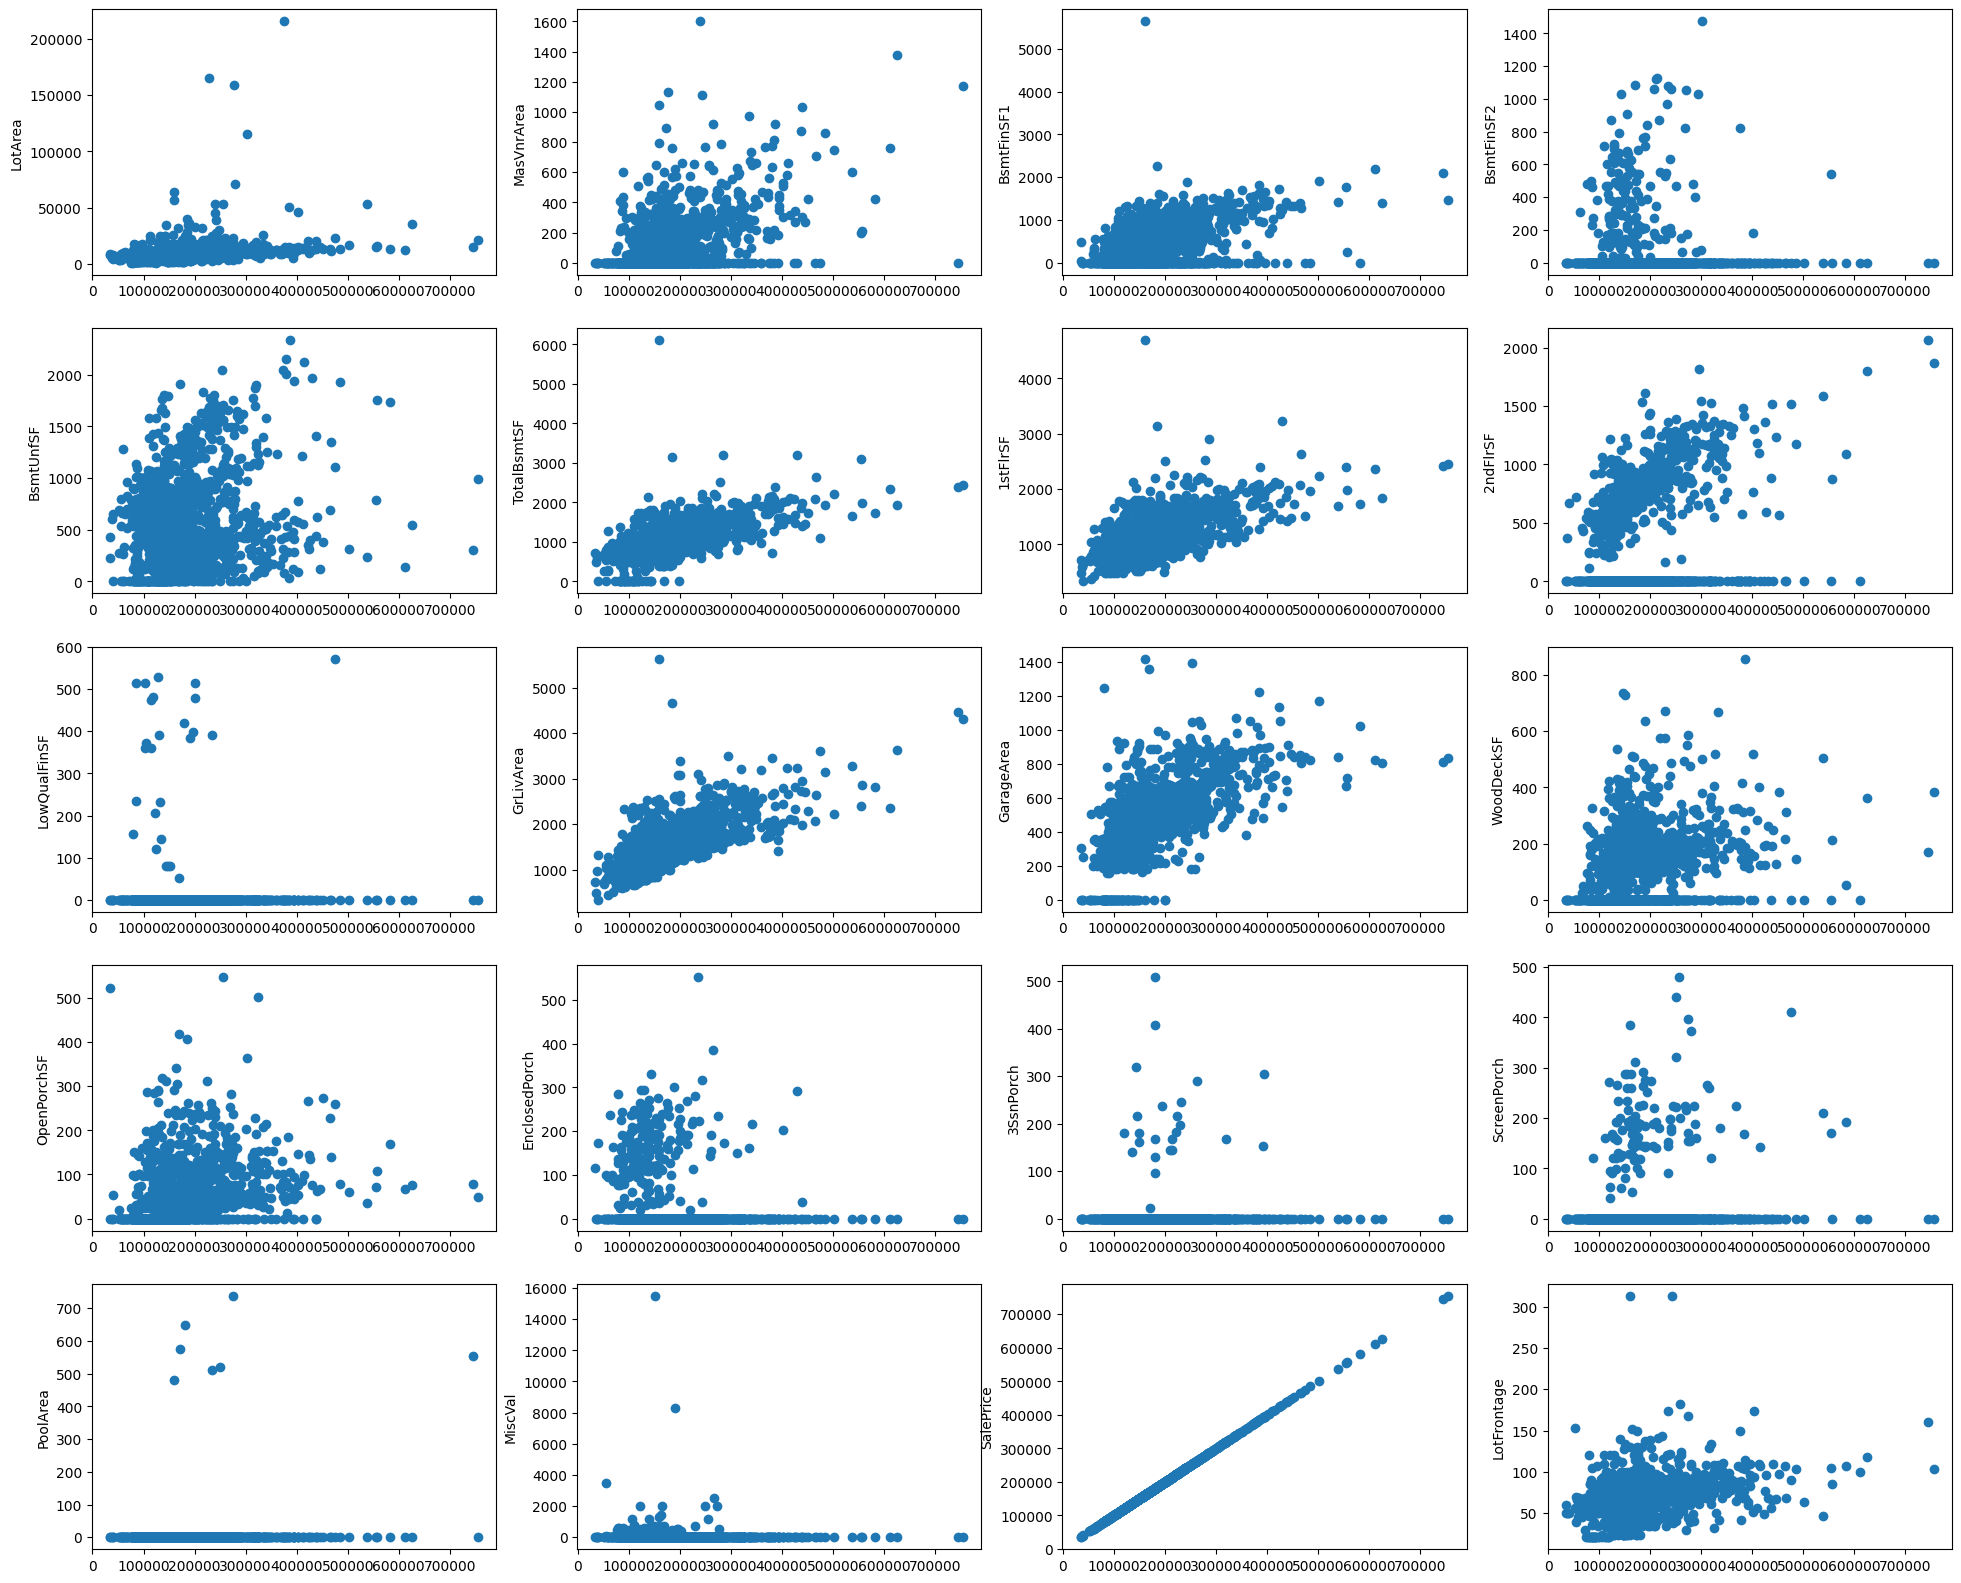

In [14]:
# Bivariate Analysis for variables against SalesPrice
plt.subplots(figsize=(24,20))
j=0
for i in cont:
    j=j+1
    plt.subplot(5,4,j)
    plt.scatter(df['SalePrice'],df[i])
    plt.ylabel(i)
plt.show()

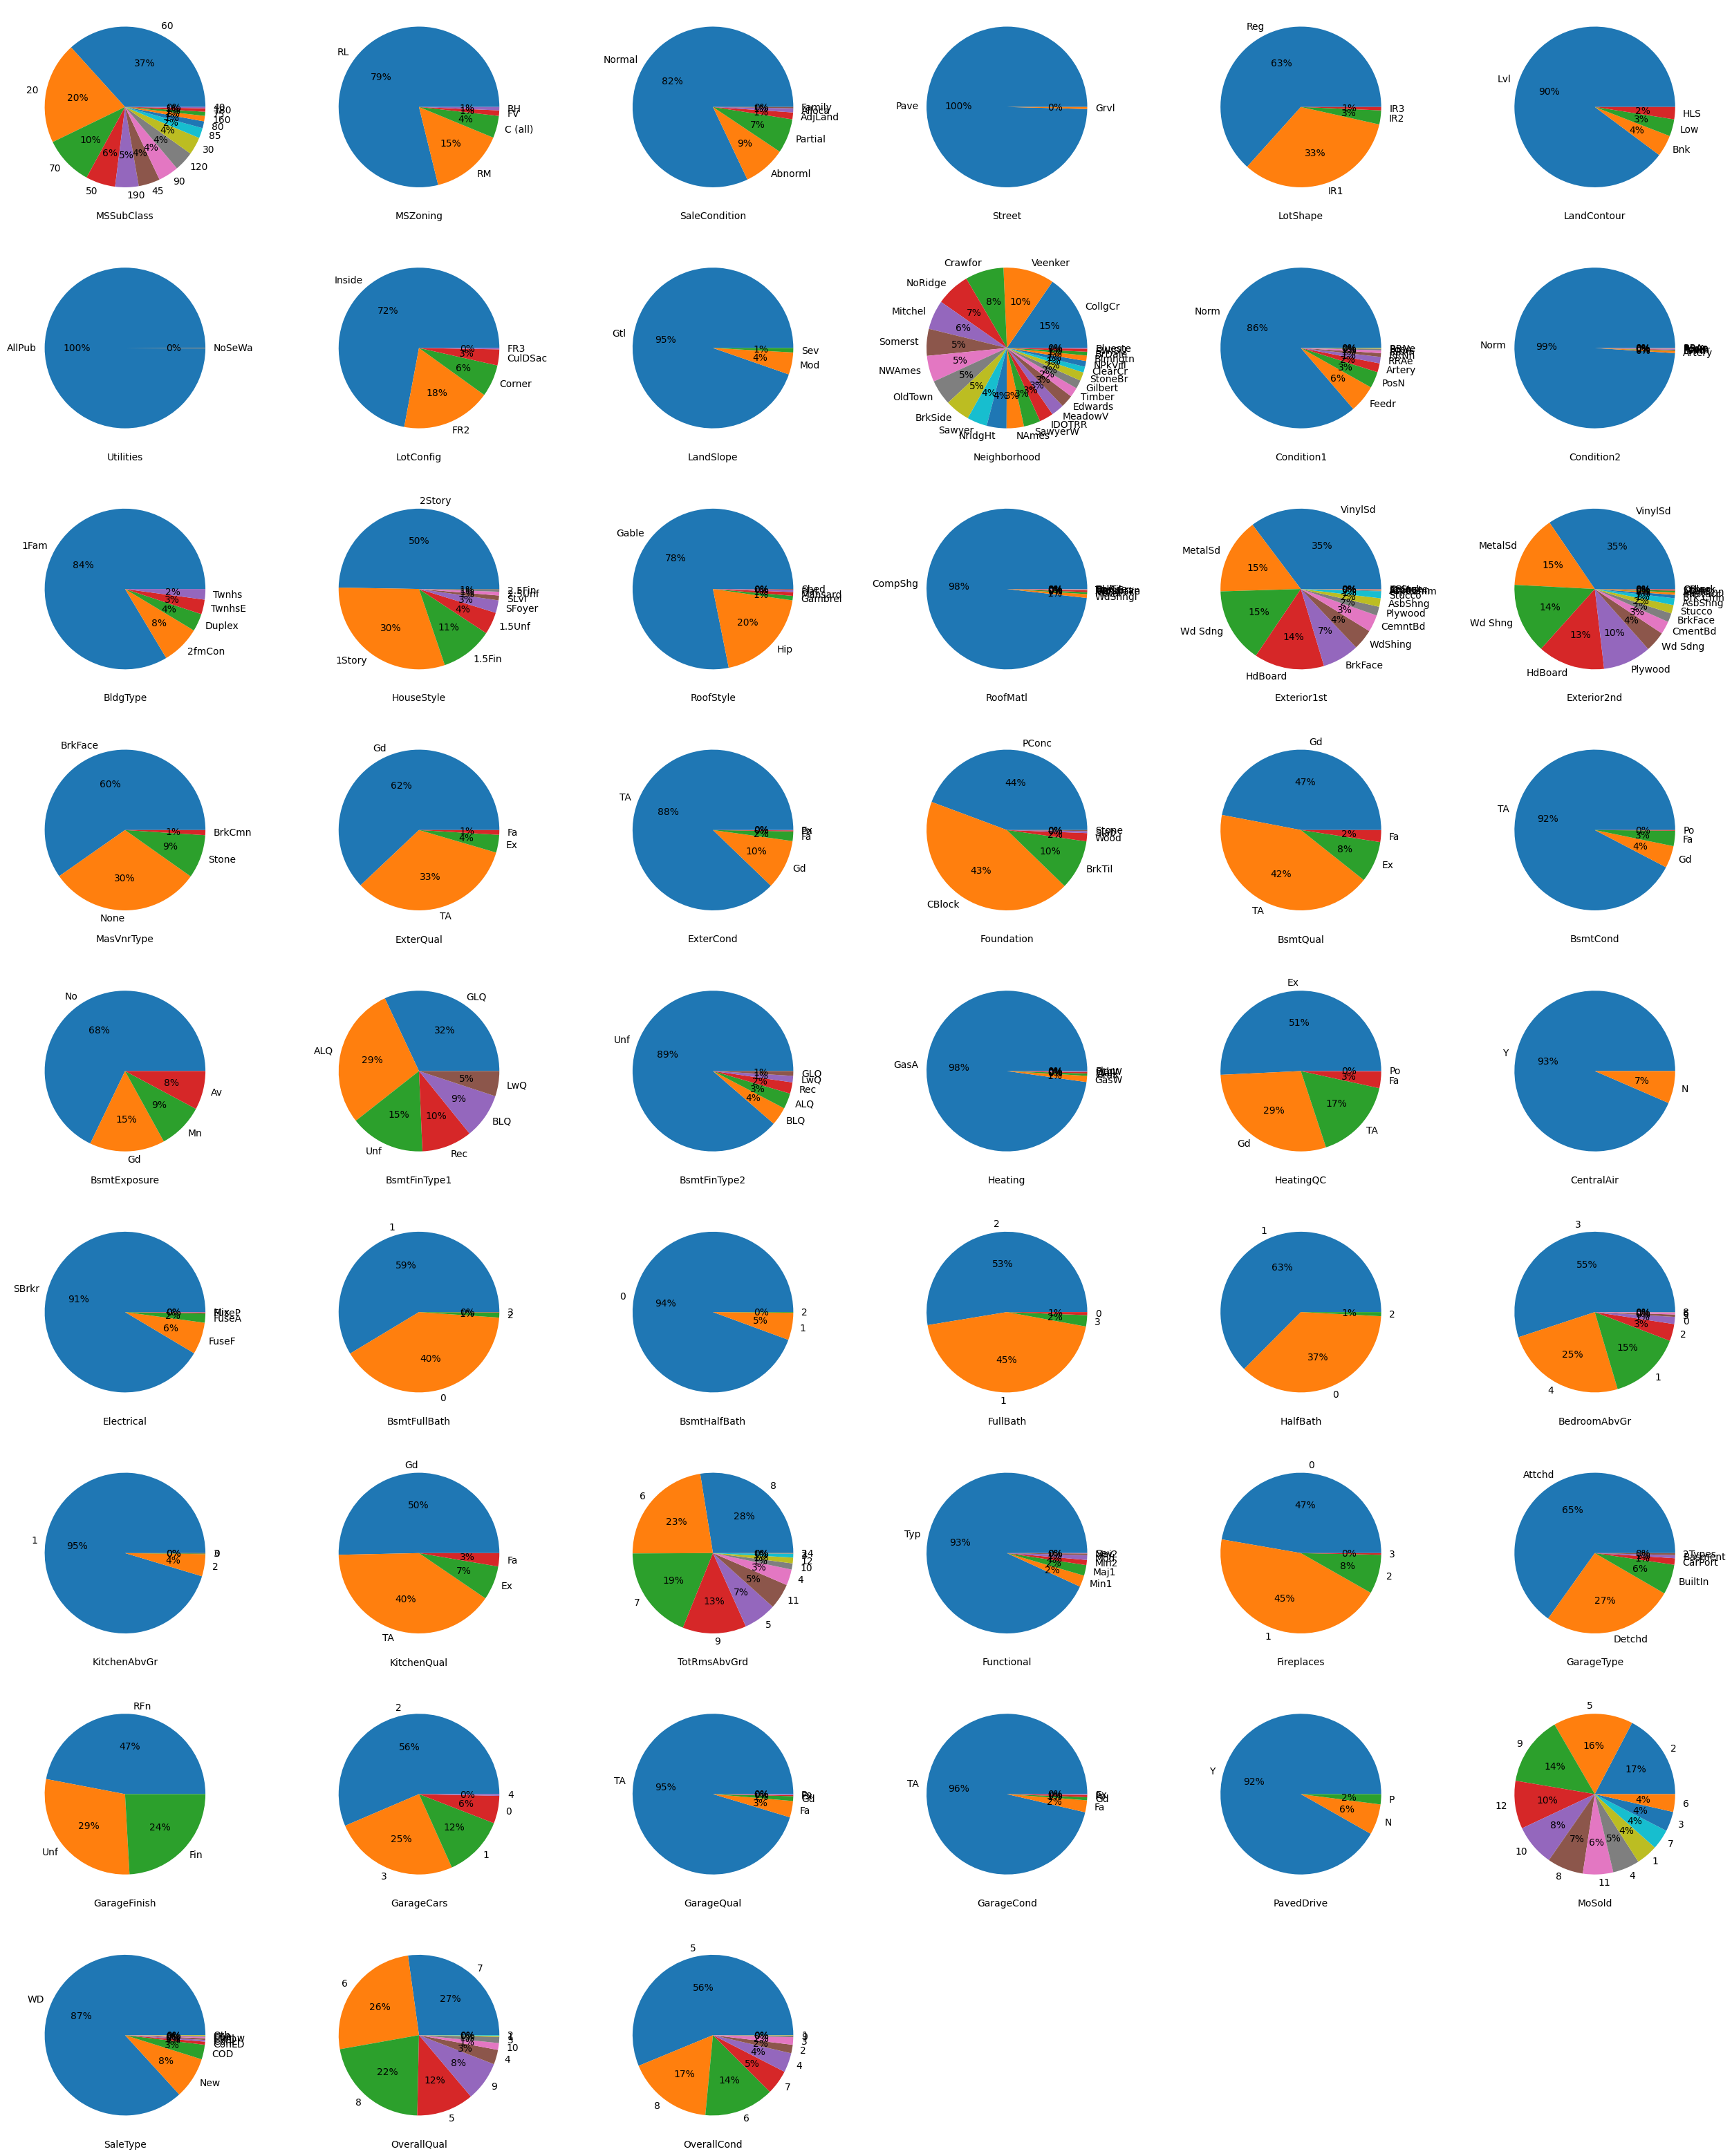

In [15]:
# Pie plot to consider if variables have low variance
plt.subplots(figsize=(32,40))
j=0
for i in cat:
    j=j+1
    plt.subplot(9,6,j)
    plt.pie(df[i].value_counts(),labels=df[i].unique(), autopct='%.0f%%')
    plt.xlabel(i)
plt.show()

In [16]:
# Selecting columns with less than 10% variance in them
bias_lis=[]
for i in cat:
    if (sorted(list(round(df[i].value_counts(normalize=True),2)),reverse=True))[0] >=0.90:
        print(i, ' has less than 10% bias data \n',round(df[i].value_counts(normalize=True),2))
        print('***********************')
        bias_lis.append(i)

Street  has less than 10% bias data 
 Pave    1.0
Grvl    0.0
Name: Street, dtype: float64
***********************
LandContour  has less than 10% bias data 
 Lvl    0.90
Bnk    0.04
HLS    0.03
Low    0.02
Name: LandContour, dtype: float64
***********************
Utilities  has less than 10% bias data 
 AllPub    1.0
NoSeWa    0.0
Name: Utilities, dtype: float64
***********************
LandSlope  has less than 10% bias data 
 Gtl    0.95
Mod    0.04
Sev    0.01
Name: LandSlope, dtype: float64
***********************
Condition2  has less than 10% bias data 
 Norm      0.99
Feedr     0.00
Artery    0.00
RRNn      0.00
PosN      0.00
PosA      0.00
RRAn      0.00
RRAe      0.00
Name: Condition2, dtype: float64
***********************
RoofMatl  has less than 10% bias data 
 CompShg    0.98
Tar&Grv    0.01
WdShngl    0.00
WdShake    0.00
Metal      0.00
Membran    0.00
Roll       0.00
ClyTile    0.00
Name: RoofMatl, dtype: float64
***********************
BsmtCond  has less than 10% bias dat

In [17]:
for i in cont:
    if (sorted(list(round(df[i].value_counts(normalize=True),2)),reverse=True))[0] >=0.90:
        print(i, ' has less than 10% bias data \n',round(df[i].value_counts(normalize=True),2))
        print('***********************')
        bias_lis.append(i)

LowQualFinSF  has less than 10% bias data 
 0      0.98
80     0.00
360    0.00
205    0.00
479    0.00
397    0.00
514    0.00
120    0.00
481    0.00
232    0.00
53     0.00
515    0.00
156    0.00
473    0.00
420    0.00
390    0.00
371    0.00
392    0.00
144    0.00
572    0.00
528    0.00
234    0.00
513    0.00
384    0.00
Name: LowQualFinSF, dtype: float64
***********************
3SsnPorch  has less than 10% bias data 
 0      0.98
168    0.00
144    0.00
180    0.00
216    0.00
290    0.00
153    0.00
96     0.00
23     0.00
162    0.00
182    0.00
196    0.00
320    0.00
245    0.00
238    0.00
508    0.00
140    0.00
130    0.00
407    0.00
304    0.00
Name: 3SsnPorch, dtype: float64
***********************
ScreenPorch  has less than 10% bias data 
 0      0.92
192    0.00
120    0.00
224    0.00
189    0.00
       ... 
291    0.00
260    0.00
385    0.00
156    0.00
40     0.00
Name: ScreenPorch, Length: 76, dtype: float64
***********************
PoolArea  has less than 10%

In [18]:
# Dropping low variance columns
df=df.drop(bias_lis,axis='columns')

In [19]:
df.shape

(1460, 55)

In [20]:
# Deriving age columns from Year
df['Property_Age'] = df.YrSold - df.YearBuilt
df['YearRemodAdd_Age'] = df.YearRemodAdd-df.YearBuilt
df['GarageBlt_Age'] = df.GarageYrBlt-df.YearBuilt
df=df.drop(columns=['YrSold', 'YearBuilt','YearRemodAdd','GarageYrBlt'])

In [21]:
cont_out=[]
for i in cont:
    if i in df.columns:
        Q1=df[i].quantile(.25)
        Q3=df[i].quantile(.97)
        IQR=Q3-Q1
        if df[i].describe()[7]> Q3+(1.5*IQR) or df[i].describe()[3]<Q1-(1.5*IQR):
            cont_out.append(i)

In [22]:
# Dropping Outliers from Dataset
def drop_outliers(x):
    list = []
    for col in cont_out:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.97)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))]
    return x

df=drop_outliers(df)

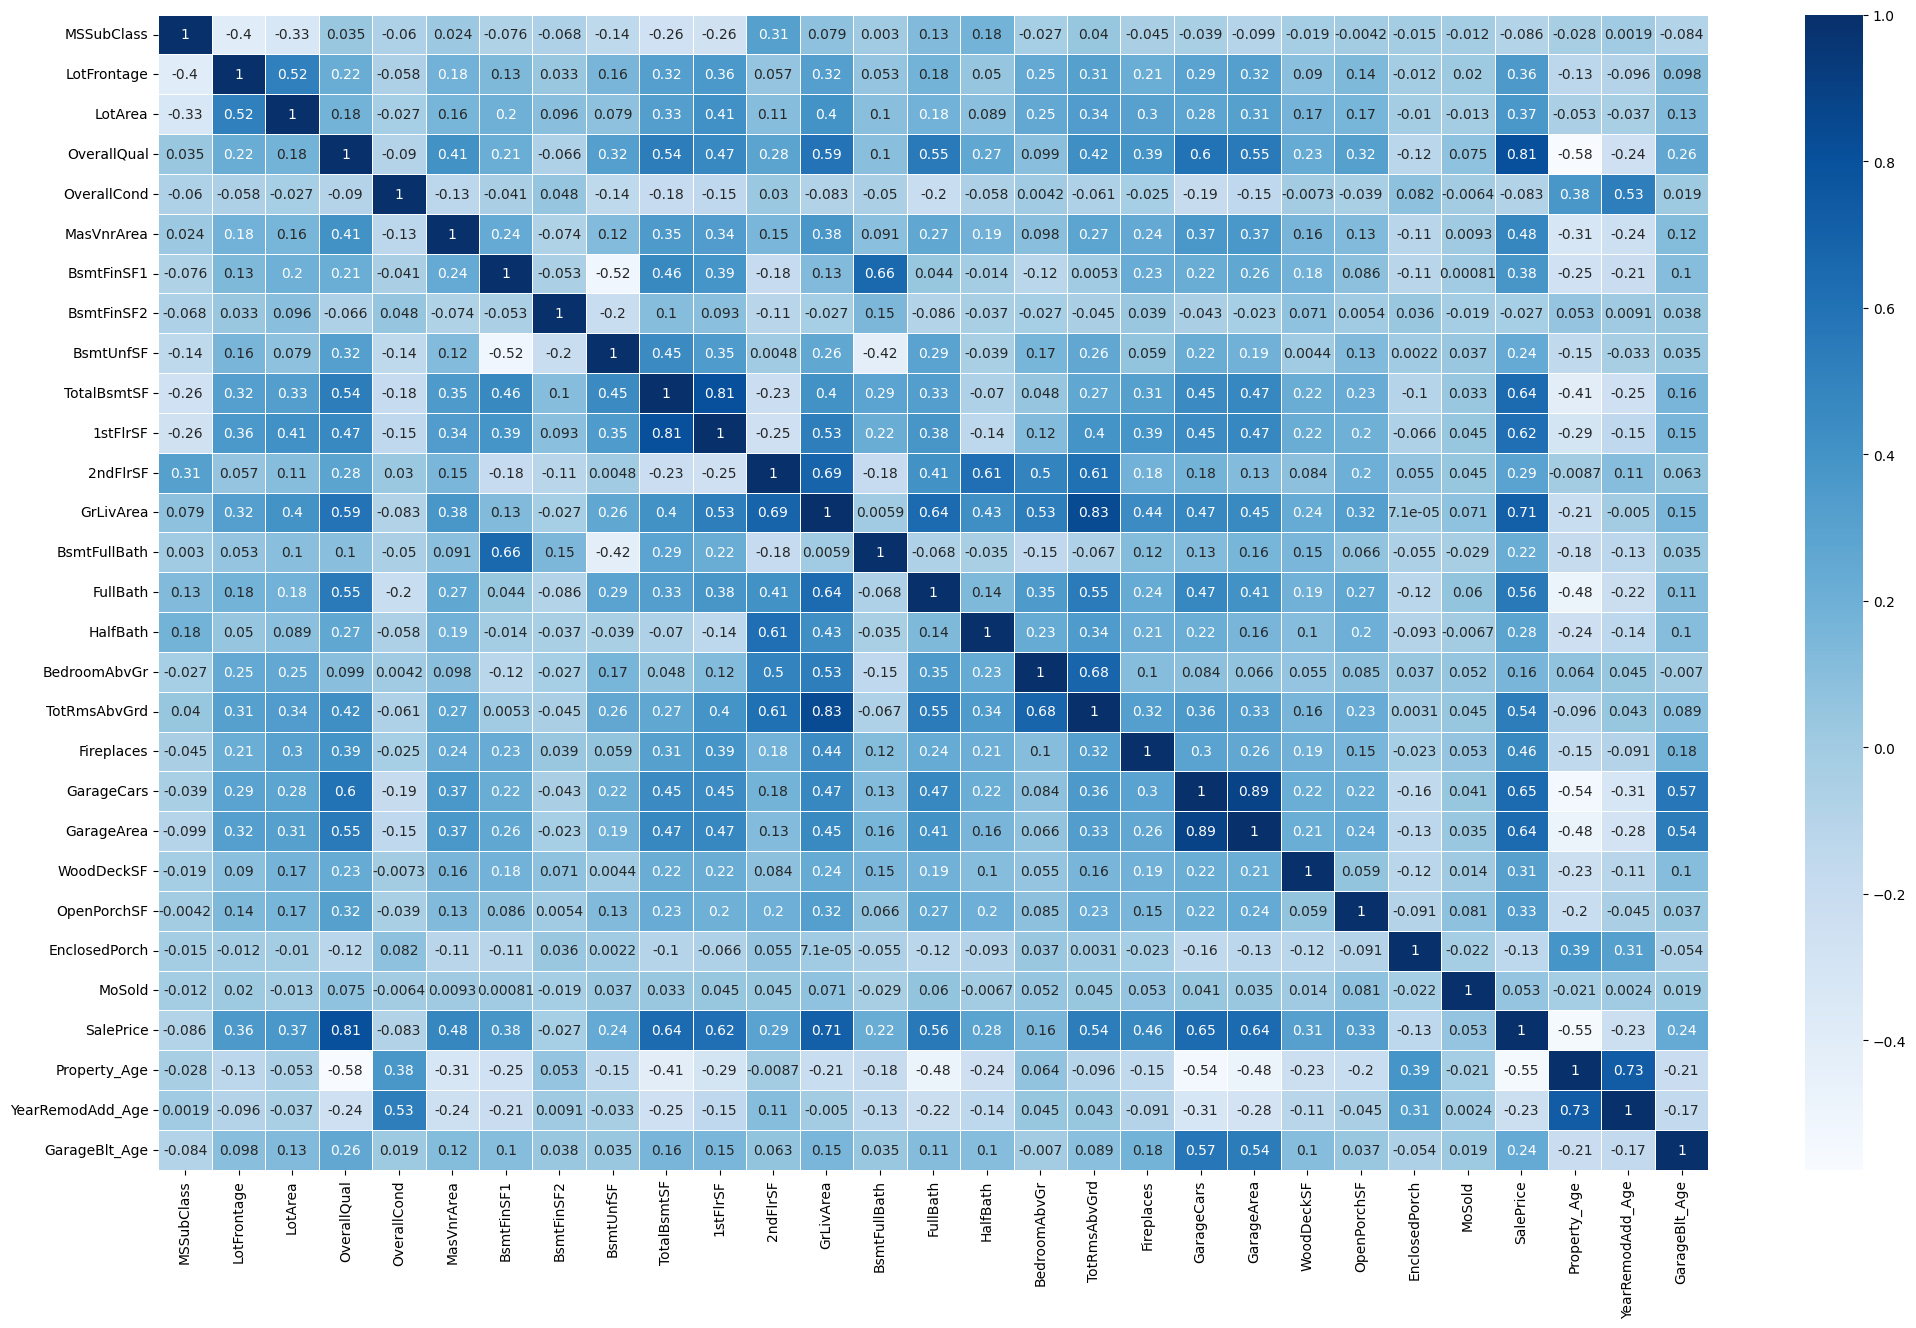

In [23]:
# Correlation Matrix
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.7,cmap='Blues')
plt.show()

In [24]:
object_columns = []
for c in df.columns:
    if df[c].dtype == np.object:
        object_columns.append(c)

In [25]:
# Creating Dummies for Categorical columns
for i in object_columns:
    df=pd.concat([df,pd.get_dummies(df[i],drop_first=True,prefix=i)],axis=1)

df.shape

(1440, 205)

In [26]:
for i in object_columns:
    df=df.drop(columns=[i])

In [27]:
df.shape

(1440, 180)

In [28]:
#Splitting Data into Train and Test Sets
df_train,df_test=train_test_split(df,train_size=0.70)
print(df_train.shape)
print(df_test.shape)

(1007, 180)
(433, 180)


In [29]:
# Scaling the features
scaler = MinMaxScaler()
cont = [e for e in cont if e not in ('LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal')]
df_train[cont] = scaler.fit_transform(df_train[cont])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
860,50,0.211180,0.159340,7,8,0.0,0.000000,0.0,0.423595,0.285000,...,0,0,0,0,1,0,0,0,1,0
141,20,0.354037,0.263037,7,5,0.0,0.575221,0.0,0.201579,0.541875,...,0,0,0,0,1,0,0,0,1,0
19,20,0.304348,0.157216,5,6,0.0,0.223009,0.0,0.243846,0.321563,...,0,0,0,0,0,0,0,0,0,0
404,60,0.298137,0.229853,6,5,0.0,0.000000,0.0,0.374361,0.251875,...,0,0,0,0,1,0,0,0,1,0
1122,20,0.298137,0.192602,4,3,0.0,0.000000,0.0,0.312123,0.210000,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [ ]:
# Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

In [32]:
# Using Recursive Feature Elimination
rfe = RFE(lm,n_features_to_select=55)
rfe = rfe.fit(X_train,y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 121),
 ('LotFrontage', False, 70),
 ('LotArea', False, 97),
 ('OverallQual', True, 1),
 ('OverallCond', False, 47),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 39),
 ('BsmtFullBath', False, 21),
 ('FullBath', False, 14),
 ('HalfBath', False, 15),
 ('BedroomAbvGr', False, 72),
 ('TotRmsAbvGrd', False, 73),
 ('Fireplaces', False, 32),
 ('GarageCars', False, 43),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 50),
 ('EnclosedPorch', False, 41),
 ('MoSold', False, 105),
 ('Property_Age', False, 119),
 ('YearRemodAdd_Age', False, 122),
 ('GarageBlt_Age', False, 123),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 23),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 7),
 ('LotShape_IR2', False, 42),
 ('LotShape_IR3', False, 33),
 ('LotShape_Reg', False, 81),
 ('LotConfig_CulDSac',

In [34]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF',
       'MSZoning_FV', 'MSZoning_RL', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'BldgType_Duplex', 'BldgType_TwnhsE', 'RoofStyle_Mansard',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_Stone',
       'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_Fa', 'Foundation_Slab', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'HeatingQC_Fa', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'Ga

In [35]:
X_train_rfe=X_train[col]
# Checking for collinearity among variables using VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
27,Exterior1st_CBlock,inf
30,Exterior2nd_CBlock,inf
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
0,OverallQual,60.12
46,GarageType_Attchd,51.54
54,SaleCondition_Partial,47.03
51,SaleType_New,46.80


## Model-1

In [36]:
X_train_lm1=sm.add_constant(X_train_rfe)
lm_1=sm.OLS(y_train,X_train_lm1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     141.4
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:29:45   Log-Likelihood:                 1725.1
No. Observations:                1007   AIC:                            -3342.
Df Residuals:                     953   BIC:                            -3077.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [37]:
# Removing columns with high p-value
X_new=X_train_rfe.drop(['SaleCondition_Partial','SaleType_Oth','SaleType_Oth','GarageType_Basment','Exterior1st_CBlock',
                      'Exterior2nd_AsphShn','RoofStyle_Mansard','LotConfig_FR3','Neighborhood_BrDale'],axis=1)
# Calculating Multicollinearity among columns
vif=pd.DataFrame()
vif['Features']=X_new.columns
vif['VIF']=[variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
0,OverallQual,51.39
30,ExterQual_TA,37.15
41,GarageType_Attchd,30.00
6,1stFlrSF,26.40
40,KitchenQual_TA,22.49
29,ExterQual_Gd,16.68


## Model-2

In [38]:
X_train_lm2=sm.add_constant(X_new)
lm_2=sm.OLS(y_train,X_train_lm2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     162.8
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:32:56   Log-Likelihood:                 1721.6
No. Observations:                1007   AIC:                            -3349.
Df Residuals:                     960   BIC:                            -3118.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0721 

## Model-3

In [39]:
X_new2=X_new.drop(['BsmtFinSF2','BsmtUnfSF','Exterior2nd_BrkFace','Exterior2nd_CBlock','Exterior2nd_CBlock',
                   'Exterior2nd_Wd Shng','ExterCond_Fa','Foundation_Slab','GarageType_Attchd','GarageType_Detchd'],axis='columns')
vif=pd.DataFrame()
vif['Features']=X_new2.columns
vif['VIF']=[variance_inflation_factor(X_new2,i) for i in range(X_new2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,43.97
25,ExterQual_TA,35.70
3,TotalBsmtSF,30.48
4,1stFlrSF,21.66
33,KitchenQual_TA,21.41
24,ExterQual_Gd,16.25
32,KitchenQual_Gd,14.34
28,BsmtQual_TA,12.37
6,GarageArea,10.97
37,SaleCondition_Normal,9.91


In [40]:
X_train_lm3=sm.add_constant(X_new2)
lm_3=sm.OLS(y_train,X_train_lm3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:37:01   Log-Likelihood:                 1713.9
No. Observations:                1007   AIC:                            -3350.
Df Residuals:                     968   BIC:                            -3158.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0847 

## Model-4

In [41]:
X_new3=X_new2.drop(['Exterior2nd_Stone','Condition1_PosA','ExterQual_TA'],axis=1)
vif=pd.DataFrame()
vif['Features']=X_new3.columns
vif['VIF']=[variance_inflation_factor(X_new3,i) for i in range(X_new3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,42.29
3,TotalBsmtSF,30.15
4,1stFlrSF,21.36
30,KitchenQual_TA,12.99
6,GarageArea,10.91
25,BsmtQual_TA,10.58
34,SaleCondition_Normal,9.85
29,KitchenQual_Gd,9.84
24,BsmtQual_Gd,8.22
9,MSZoning_RL,7.10


In [42]:
X_train_lm4=sm.add_constant(X_new3)
lm_4=sm.OLS(y_train,X_train_lm4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     207.6
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:38:17   Log-Likelihood:                 1703.0
No. Observations:                1007   AIC:                            -3334.
Df Residuals:                     971   BIC:                            -3157.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0459 

## Model - 5

In [43]:
X_new4=X_new3.drop(['OverallQual','ExterQual_Gd','ExterQual_Fa'],axis=1)
vif=pd.DataFrame()
vif['Features']=X_new4.columns
vif['VIF']=[variance_inflation_factor(X_new4,i) for i in range(X_new4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,TotalBsmtSF,26.82
3,1stFlrSF,20.94
27,KitchenQual_TA,12.54
5,GarageArea,10.34
22,BsmtQual_TA,10.09
31,SaleCondition_Normal,9.32
26,KitchenQual_Gd,8.98
21,BsmtQual_Gd,7.98
8,MSZoning_RL,6.92
1,BsmtFinSF1,3.01


In [44]:
X_train_lm5=sm.add_constant(X_new4)
lm_5=sm.OLS(y_train,X_train_lm5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:39:01   Log-Likelihood:                 1653.4
No. Observations:                1007   AIC:                            -3241.
Df Residuals:                     974   BIC:                            -3079.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1586 

## Model-6

In [45]:
X_new5=X_new4.drop(['LotConfig_FR2','GarageType_BuiltIn','TotalBsmtSF'],axis=1)
vif=pd.DataFrame()
vif['Features']=X_new5.columns
vif['VIF']=[variance_inflation_factor(X_new5,i) for i in range(X_new5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
25,KitchenQual_TA,12.10
2,1stFlrSF,10.63
4,GarageArea,10.25
20,BsmtQual_TA,9.98
28,SaleCondition_Normal,9.18
24,KitchenQual_Gd,8.79
19,BsmtQual_Gd,7.86
7,MSZoning_RL,6.83
1,BsmtFinSF1,2.81
3,2ndFlrSF,2.33


In [46]:
X_train_lm6=sm.add_constant(X_new5)
lm_6=sm.OLS(y_train,X_train_lm6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:39:59   Log-Likelihood:                 1637.5
No. Observations:                1007   AIC:                            -3215.
Df Residuals:                     977   BIC:                            -3068.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1807 

## Model-7

In [47]:
X_new6=X_new5.drop(['KitchenQual_TA','HeatingQC_Fa'],axis=1)

vif=pd.DataFrame()
vif['Features']=X_new6.columns
vif['VIF']=[variance_inflation_factor(X_new6,i) for i in range(X_new6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,1stFlrSF,10.60
4,GarageArea,10.21
26,SaleCondition_Normal,8.51
7,MSZoning_RL,6.76
19,BsmtQual_Gd,5.10
20,BsmtQual_TA,4.92
1,BsmtFinSF1,2.81
23,KitchenQual_Gd,2.47
3,2ndFlrSF,2.32
25,SaleType_New,2.22


In [48]:
X_train_lm7=sm.add_constant(X_new6)
lm_7=sm.OLS(y_train,X_train_lm7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:40:45   Log-Likelihood:                 1574.9
No. Observations:                1007   AIC:                            -3094.
Df Residuals:                     979   BIC:                            -2956.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0941 

## Model -8

In [49]:
X_new7=X_new6.drop(['SaleType_Con','1stFlrSF'],axis=1)
vif=pd.DataFrame()
vif['Features']=X_new7.columns
vif['VIF']=[variance_inflation_factor(X_new7,i) for i in range(X_new7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,GarageArea,8.66
24,SaleCondition_Normal,8.42
6,MSZoning_RL,6.49
18,BsmtQual_Gd,5.06
19,BsmtQual_TA,4.75
1,BsmtFinSF1,2.71
22,KitchenQual_Gd,2.43
23,SaleType_New,2.14
2,2ndFlrSF,2.10
0,MasVnrArea,2.02


In [50]:
X_train_lm8=sm.add_constant(X_new7)
lm_8=sm.OLS(y_train,X_train_lm8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          5.02e-312
Time:                        14:41:15   Log-Likelihood:                 1413.5
No. Observations:                1007   AIC:                            -2775.
Df Residuals:                     981   BIC:                            -2647.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1683 

## Model -9

In [52]:
X_new8=X_new7.drop(['Condition1_PosN','Condition1_RRAe','GarageArea'],axis=1)
vif=pd.DataFrame()
vif['Features']=X_new8.columns
vif['VIF']=[variance_inflation_factor(X_new8,i) for i in range(X_new8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
21,SaleCondition_Normal,7.93
5,MSZoning_RL,6.23
15,BsmtQual_Gd,4.86
16,BsmtQual_TA,4.51
1,BsmtFinSF1,2.62
19,KitchenQual_Gd,2.36
2,2ndFlrSF,2.07
20,SaleType_New,1.93
0,MasVnrArea,1.92
3,WoodDeckSF,1.80


In [53]:
X_train_lm9=sm.add_constant(X_new8)
lm_9=sm.OLS(y_train,X_train_lm9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     149.4
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          4.07e-295
Time:                        14:42:05   Log-Likelihood:                 1365.6
No. Observations:                1007   AIC:                            -2685.
Df Residuals:                     984   BIC:                            -2572.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2162 

In [77]:
# Predicting on Training Set
y_train_pred = lm_9.predict(X_train_lm9)

In [55]:
# Calculating R2 score on Train Set
r2 = r2_score(y_true = y_train,y_pred = y_train_pred)
round(r2,2)

0.77

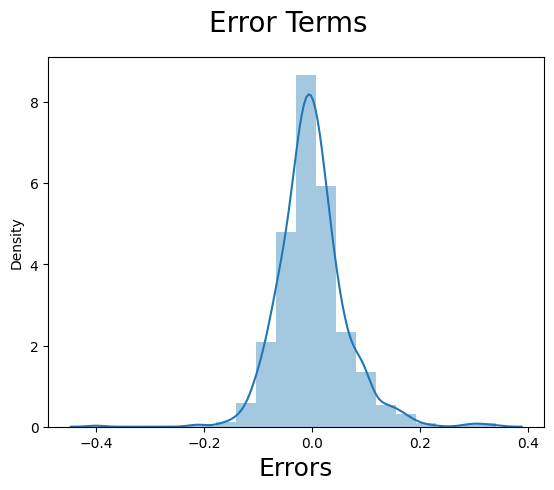

In [56]:
# Analysing Error Terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [57]:
# Calculating RSS, MSE And RMSE for Training Data
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
rmse = mse**0.5
print(rmse)

3.914480501624356
0.0038872696143240873
0.06234797201452576


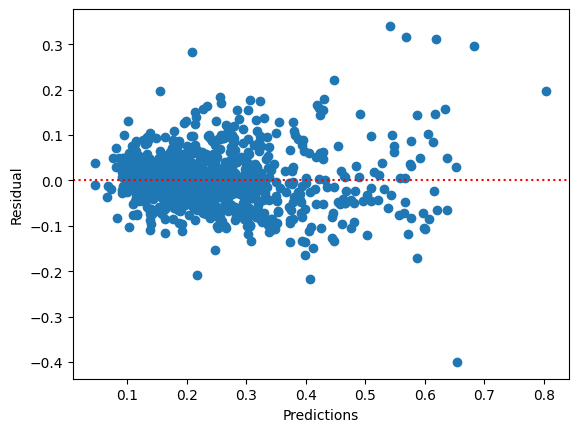

In [58]:
# Checking for heteroscedasticity
y_res = (y_train - y_train_pred)
plt.scatter( y_train_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [59]:
# Scaling Test data for predictions
df_test[cont] = scaler.transform(df_test[cont])
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
287,20,0.298137,0.171852,4,4,0.000000,0.271681,0.000000,0.113330,0.268125,...,0,0,0,0,1,0,0,0,1,0
528,30,0.229814,0.197057,4,7,0.000000,0.153982,0.000000,0.083604,0.165000,...,0,0,0,0,1,0,0,0,1,0
44,20,0.304348,0.167189,5,6,0.000000,0.079204,0.451786,0.215978,0.359375,...,0,0,0,0,1,0,0,0,1,0
891,60,0.304348,0.251094,6,5,0.066763,0.100000,0.446429,0.089178,0.286875,...,0,0,0,0,1,0,0,0,1,0
75,180,0.000000,0.002720,4,5,0.000000,0.204425,0.000000,0.000000,0.144375,...,0,0,0,0,1,0,0,0,1,0


In [60]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [61]:
# Building Linear Regression Model for Test Data
X_test_new = X_test[X_new8.columns]
X_test_new = sm.add_constant(X_test_new)
test_lm = sm.OLS(y_test,X_test_new).fit()
print(test_lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     51.99
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          5.42e-104
Time:                        14:44:42   Log-Likelihood:                 579.43
No. Observations:                 433   AIC:                            -1113.
Df Residuals:                     410   BIC:                            -1019.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2800 

In [62]:
# Predicting on Test Data
y_pred = lm_9.predict(X_test_new)

In [63]:
# Calculating R2 Score of Test Data
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.71

In [66]:
# Calculating Residual Sum of Squares, Mean Squared Error and Root Mean Squared Error
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1.9388178862435987
0.004477639460146879
0.06691516614450628


Text(0, 0.5, 'y_pred')

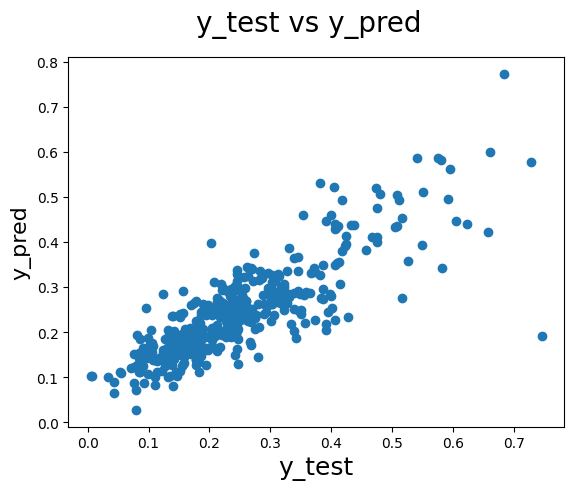

In [65]:
# Plotting Y_Test vs Y-Pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### Conclusion
-  R2 Score for test data is 0.71, lesser than train data r2-score, indicating overfitting

## Ridge Regression

In [78]:
# Defining alpha parameters for Ridge and Lasso Regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [79]:
# Calling Ridge regression
ridge = Ridge()

In [80]:
# Using Cross Validation to estimate best alpha value
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 4)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END alpha=0.0001;, score=(train=-0.024, test=-0.032) total time=   0.1s
[CV 2/5] END alpha=0.0001;, score=(train=-0.023, test=-0.030) total time=   0.1s
[CV 3/5] END alpha=0.0001;, score=(train=-0.023, test=-0.033) total time=   0.1s
[CV 4/5] END alpha=0.0001;, score=(train=-0.024, test=-0.033) total time=   0.1s
[CV 5/5] END alpha=0.0001;, score=(train=-0.023, test=-0.032) total time=   0.1s
[CV 1/5] END .alpha=0.001;, score=(train=-0.024, test=-0.032) total time=   0.1s
[CV 2/5] END .alpha=0.001;, score=(train=-0.023, test=-0.030) total time=   0.1s
[CV 3/5] END .alpha=0.001;, score=(train=-0.023, test=-0.033) total time=   0.1s
[CV 4/5] END .alpha=0.001;, score=(train=-0.024, test=-0.033) total time=   0.1s
[CV 5/5] END .alpha=0.001;, score=(train=-0.023, test=-0.032) total time=   0.1s
[CV 1/5] END ..alpha=0.01;, score=(train=-0.024, test=-0.032) total time=   0.1s
[CV 2/5] END ..alpha=0.01;, score=(train=-0.023

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=4)

In [81]:
print(model_cv.best_params_)

{'alpha': 4.0}


In [82]:
# Training and Predicting using Ridge Regression
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [83]:
# Calculating R2 score and mean squared error on train and test data
r2_train_rdge = r2_score(y_train, y_pred_train)
print('Train Set R2: ',r2_train_rdge)

r2_test_rdge = r2_score(y_test, y_pred_test)
print('Test Set R2: ',r2_test_rdge)

mse_train_rdge=mean_squared_error(y_train, y_pred_train)
mse_test_rdge = mean_squared_error(y_test, y_pred_test)

print('MSE Train Ridge: ',mse_train_rdge)
print('MSE Test Ridge: ',mse_test_rdge)

Train Set R2:  0.9065884627278353
Test Set R2:  0.8928905146287096
MSE Train Ridge:  0.0015760652942182127
MSE Test Ridge:  0.0016354535572358194


### Conclusion
-  R2 score of test data is 0.893 using Ridge Regression

## Lasso Regression

In [84]:
# Initializing Lasso Regression model
lasso = Lasso()


In [ ]:
# Using Cross Validation to identify best alpha value
folds=5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 5)

model_cv.fit(X_train, y_train)

In [86]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [87]:
# Training and predicting using Lasso Regression
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [88]:
# Calculating R2 Score of Train and Test Data
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print('Train Set R2: ',r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print('Test Set R2: ',r2_test_lasso)

mse_train_lasso=mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)

print('MSE Train Lasso: ',mse_train_lasso)
print('MSE Test Lasso: ',mse_test_lasso)

Train Set R2:  0.905533824128149
Test Set R2:  0.8962566626548709
MSE Train Lasso:  0.0015938594483821211
MSE Test Lasso:  0.0015840558799480953


### Conclusion
-  R2 Score using Lasso regression for test data is 0.897

### Questions

In [89]:
# Doubling the Alpha Parameter for Ridge and predicting
ridge1 = Ridge(alpha=8)
ridge1.fit(X_train,y_train)
y_pred_rdge1_train = ridge1.predict(X_train)
y_pred_rdge1_test = ridge1.predict(X_test)
r2_train_rdge1 = r2_score(y_train, y_pred_rdge1_train)
print('Train Set R2: ',r2_train_rdge1)

r2_test_rdge1 = r2_score(y_test, y_pred_rdge1_test)
print('Test Set R2: ',r2_test_rdge1)

Train Set R2:  0.9019611272845696
Test Set R2:  0.8921567151754414


In [90]:
# Doubling the Alpha Parameter for Lasso and predicting
alpha = 0.0002
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train,y_train)
y_pred_train_lasso1 = lasso1.predict(X_train)
y_pred_test_lasso1 = lasso1.predict(X_test)
r2_train_lasso1 = r2_score(y_train, y_pred_train_lasso1)
print('Train Set R2: ',r2_train_lasso1)

r2_test_lasso1 = r2_score(y_test, y_pred_test_lasso1)
print('Test Set R2: ',r2_test_lasso1)

Train Set R2:  0.9001458488700244
Test Set R2:  0.8979677899289349


<B>Conclusion:</B>
-  After doubling alpha parameter the accuracy value drops as model is more generalised than before now.

In [92]:
# Dropping top 5 features and building Lasso Regression
X_train_drop=X_train.drop(['1stFlrSF','Neighborhood_StoneBr','TotalBsmtSF','2ndFlrSF','MasVnrArea'],axis='columns')
X_test_drop=X_test.drop(['1stFlrSF','Neighborhood_StoneBr','TotalBsmtSF','2ndFlrSF','MasVnrArea'],axis='columns')
lasso_drop=Lasso()

model_cv_drop = GridSearchCV(estimator = lasso_drop,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 5)
model_cv_drop.fit(X_train_drop,y_train)
# Printing the best hyperparameter alpha
print(model_cv_drop.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END alpha=0.0001;, score=(train=-0.025, test=-0.031) total time=   0.0s
[CV 2/5] END alpha=0.0001;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 3/5] END alpha=0.0001;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 4/5] END alpha=0.0001;, score=(train=-0.024, test=-0.032) total time=   0.0s
[CV 5/5] END alpha=0.0001;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/5] END .alpha=0.001;, score=(train=-0.034, test=-0.037) total time=   0.0s
[CV 2/5] END .alpha=0.001;, score=(train=-0.034, test=-0.035) total time=   0.0s
[CV 3/5] END .alpha=0.001;, score=(train=-0.034, test=-0.037) total time=   0.0s
[CV 4/5] END .alpha=0.001;, score=(train=-0.034, test=-0.035) total time=   0.0s
[CV 5/5] END .alpha=0.001;, score=(train=-0.033, test=-0.035) total time=   0.0s
[CV 1/5] END ..alpha=0.01;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/5] END ..alpha=0.01;, score=(train=-0.046

In [93]:
# Training and Predicting Lasso after dropping top 5 features
lasso_drop = Lasso(alpha=0.0001)
lasso_drop.fit(X_train_drop,y_train)
y_pred_train_lasso_drp = lasso_drop.predict(X_train_drop)
y_pred_test_lasso_drp = lasso_drop.predict(X_test_drop)
r2_train_lasso_drp = r2_score(y_train, y_pred_train_lasso_drp)
print('Train Set R2: ',r2_train_lasso_drp)

r2_test_lasso_drp = r2_score(y_test, y_pred_test_lasso_drp)
print('Test Set R2: ',r2_test_lasso_drp)

Train Set R2:  0.8991123561560723
Test Set R2:  0.897321538988169


<B> Conclusion :</B>
-  After dropping  top 5 features the accuracy of model decreases both on Test and Train Data